In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from datetime import datetime
from math import nan

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### quick view on all dataset

# 'matches' dataset

In [4]:
with sqlite3.connect('database.sqlite') as con:
    matches = pd.read_sql_query("SELECT * from Match", con)

In [5]:
matches.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

In [6]:
matches.shape

(25979, 115)

In [7]:
columns = list(matches.columns)

- Drop entire columns that have too much missing data

In [8]:
drop_list = [i for i in columns if matches[i].isnull().sum() > 10000]

In [9]:
matches.drop(columns = drop_list, inplace = True)
matches.shape

(25979, 98)

In [10]:
matches.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5


In [11]:
matches.league_id.value_counts()

1729     3040
4769     3040
21518    3040
10257    3017
7809     2448
13274    2448
17642    2052
15722    1920
19694    1824
1        1728
24558    1422
Name: league_id, dtype: int64

In [12]:
matches['id'].is_unique

True

- Get rid of irrelevant gambling data

In [13]:
matches = matches.loc[:, 'id':'away_player_11']

- Drop player coordination data (temporarily)

In [14]:
X_h_col = []
for i in range(1,12):
    X_h_col.append('home_player_X' + str(i))

In [15]:
X_a_col = []
for i in range(1,12):
    X_a_col.append('away_player_X' + str(i))

In [16]:
Y_h_col = []
for i in range(1,12):
    Y_h_col.append('home_player_Y' + str(i))

In [17]:
Y_a_col = []
for i in range(1,12):
    Y_a_col.append('away_player_Y' + str(i))

In [18]:
matches = matches.drop(columns = X_h_col + X_a_col + Y_h_col + Y_a_col)

In [19]:
matches.dropna(inplace = True)

In [20]:
matches.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0


- Comfirm no missing data

In [21]:
matches.isna().sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
home_player_1       0
home_player_2       0
home_player_3       0
home_player_4       0
home_player_5       0
home_player_6       0
home_player_7       0
home_player_8       0
home_player_9       0
home_player_10      0
home_player_11      0
away_player_1       0
away_player_2       0
away_player_3       0
away_player_4       0
away_player_5       0
away_player_6       0
away_player_7       0
away_player_8       0
away_player_9       0
away_player_10      0
away_player_11      0
dtype: int64

- Transform date column to show year only

In [22]:
matches['date'] = matches.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [23]:
matches['date'].value_counts()

2015    3052
2012    2928
2014    2887
2013    2758
2011    2732
2010    2607
2009    2130
2016    1474
2008     806
Name: date, dtype: int64

In [24]:
matches.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009,493017,8203,9987,2,1,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0


In [25]:
matches.shape

(21374, 33)

#### 'player_detail' dataset

In [26]:
with sqlite3.connect('database.sqlite') as con:
    player_detail = pd.read_sql_query("SELECT * from Player_Attributes", con)

In [27]:
player_detail.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
player_detail.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

- Transform date column to show year only

In [29]:
player_detail['date'] = player_detail.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [30]:
player_detail['date'].value_counts()

2013    38867
2014    32808
2015    31834
2007    16138
2016    14103
2012    12632
2011    11976
2010    10829
2009     8993
2008     5798
Name: date, dtype: int64

In [31]:
player_detail.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

- Too many columns! Drop some ... arbitrarily .

In [32]:
player_detail.drop(columns = ['potential','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'], inplace = True)

<AxesSubplot:>

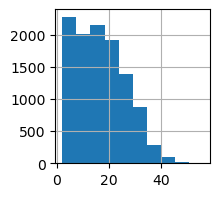

In [33]:
player_detail['player_api_id'].value_counts().hist(figsize = (2,2))

Note: 'player_api_id' has duplicates. Plot shows most of the players have 0-20 records of slightly different ratings.

- Run a overall check-out

In [34]:
to_plot = ['overall_rating','attacking_work_rate','defensive_work_rate', 
           'crossing', 'finishing', 'long_passing', 'ball_control',
           'acceleration', 'sprint_speed','agility','vision', 'sliding_tackle']

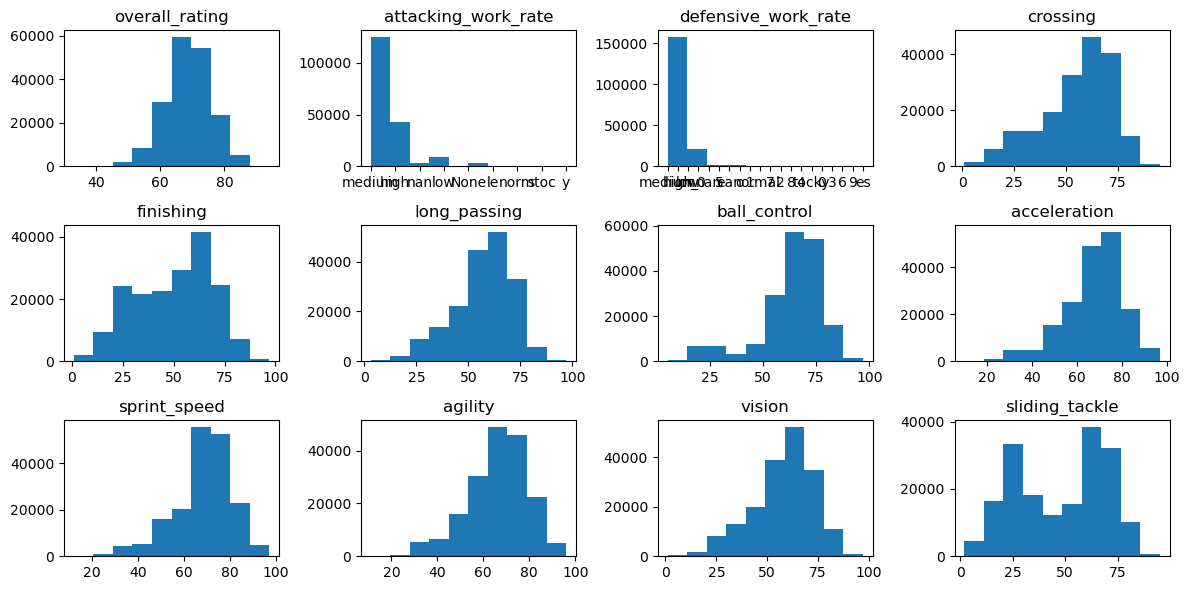

In [35]:
fig, ax = plt.subplots(3, 4, figsize = (12, 6))
a = ax.ravel()
for index,ax in enumerate(a):
    detail = [np.nan if x is None else x for x in player_detail.loc[:,to_plot[index]]]
    ax.hist(detail)
    ax.set_title(to_plot[index])
plt.tight_layout()

Note: The categories for attacking_work_rate and defensive_work_rate are not right

In [36]:
player_detail.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [37]:
player_detail.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

Note: Drop row is one way, but that will remove useful information in other columns, so I replaced messy values with 'None'.

In [38]:
player_detail.loc[~player_detail['attacking_work_rate'].isin (['high', 'medium', 'low']), 'attacking_work_rate'] = 'None'

In [39]:
player_detail.loc[~player_detail['defensive_work_rate'].isin (['high', 'medium', 'low']), 'defensive_work_rate'] = 'None'

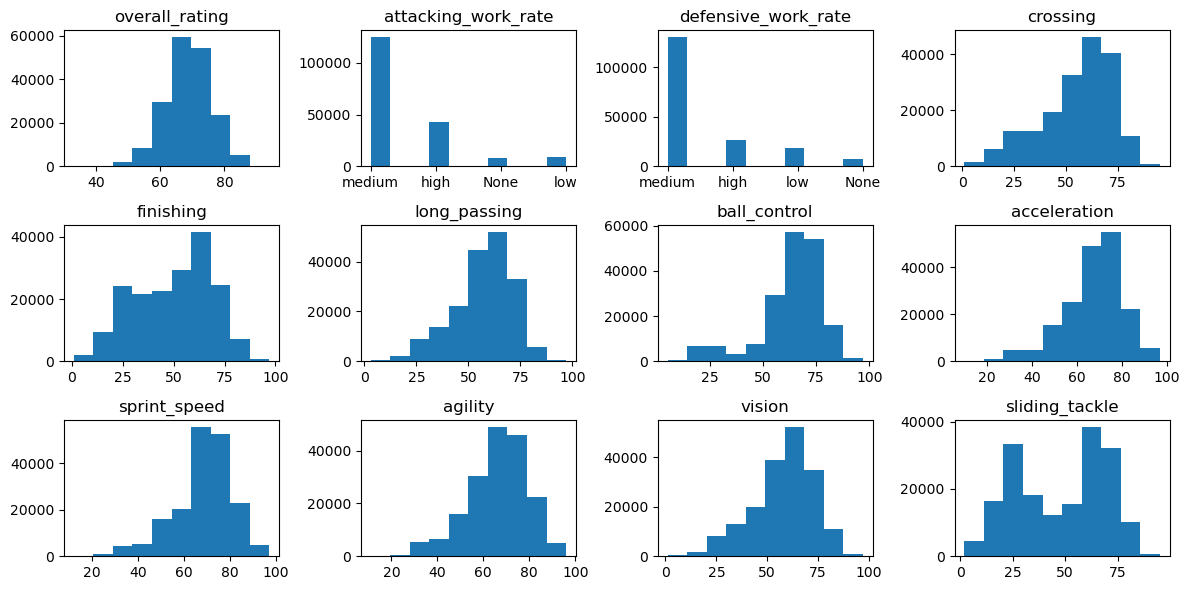

In [40]:
fig, ax = plt.subplots(3, 4, figsize = (12, 6))
a = ax.ravel()
for index,ax in enumerate(a):
    ax.hist(player_detail.loc[:,to_plot[index]])
    ax.set_title(to_plot[index])
plt.tight_layout()

### Combine

In [41]:
matches.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009,493017,8203,9987,2,1,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0
153,154,1,1,2008/2009,25,2009,493025,9984,8342,1,3,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,38357.0,37065.0,78462.0,37990.0,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0
155,156,1,1,2008/2009,25,2009,493027,8635,10000,2,0,34480.0,38388.0,26458.0,13423.0,38389.0,30949.0,38393.0,38253.0,38383.0,38778.0,37069.0,37900.0,37886.0,37903.0,37889.0,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0


In [42]:
player_detail.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
0,1,218353,505942,2016,67.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
1,2,218353,505942,2015,67.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
2,3,218353,505942,2015,62.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0


In [42]:
'''generate column lists'''

home_player_col = []
for i in range(1,12):
    home_player_col.append('home_player_' + str(i))
away_player_col = []
for i in range(1,12):
    away_player_col.append('away_player_' + str(i))
all_player_col = home_player_col + away_player_col

In [43]:
'''function to get a date from a list that's closest to a target date'''
def get_closest_date(date, date_list):
    return date_list[min(range(len(date_list)), key = lambda i: abs(date_list[i]-date))]

In [44]:
def add_home_attribute(df, attribute):
    
    match_all = {}    
    '''loop-1: loop each row because I need value of row.date for loop-2'''
    for index, row in df.iterrows():
        row = pd.Series(row)
        match_detail = {}
        '''create key 'match_api_id' for later dataframe merge'''
        match_detail['match_api_id'] = row.match_api_id
        rating_list = []
        '''loop-2: loop through 11 home players'''
        for col in home_player_col:
            player_id = row[col]
            '''find the date from player dataset that is closest to the match date'''
            date = get_closest_date(row.date, list(player_detail[player_detail.player_api_id == player_id].date))
            '''each player has multiple ratings in one year, so I average them'''
            rating_list.append(player_detail[(player_detail.player_api_id == player_id) & (
                player_detail.date == date)][attribute].mean())
        '''average the rating of all 11 players'''
        match_detail['home_'+attribute] = sum(rating_list)/len(rating_list)
        match_all[index] = match_detail
    
    '''get a dataframe that has home team's average rating in all 21,000 matches'''
    df_attr = pd.DataFrame(match_all).T
    
    return df_attr

In [45]:
def add_away_attribute(df, attribute):
    
    match_all = {}    
    for index, row in df.iterrows():
        row = pd.Series(row)
        match_detail = {}
        match_detail['match_api_id'] = row.match_api_id
        rating_list = []
        for col in away_player_col:
            player_id = row[col]
            date = get_closest_date(row.date, list(player_detail[player_detail.player_api_id == player_id].date))
            rating_list.append(player_detail[(player_detail.player_api_id == player_id) & (
                player_detail.date == date)][attribute].mean())
        match_detail['away_'+attribute] = sum(rating_list)/len(rating_list)
        match_all[index] = match_detail
    
    df_attr = pd.DataFrame(match_all).T
    
    return df_attr

In [46]:
demo = matches.iloc[0:3,:]

In [47]:
matches_new = matches[['match_api_id', 'home_team_goal', 'away_team_goal']]

In [48]:
matches_new.head()

,match_api_id,home_team_goal,away_team_goal
145,493017,2,1
153,493025,1,3
155,493027,2,0
162,493034,2,1
168,493040,0,0


In [50]:
test_list = ['overall_rating', 'crossing']

In [49]:
attr_list = ['overall_rating', 'crossing', 'finishing', 'long_passing', 'ball_control','volleys', 'dribbling',
           'acceleration', 'sprint_speed','agility','vision', 'standing_tackle', 'sliding_tackle']

In [51]:
'''loop-3: loop through multiple attributes'''
for attr in attr_list:
    home_attr = add_home_attribute(matches, attr)
    away_attr = add_away_attribute(matches, attr)
    matches_new = matches_new.merge(home_attr, on='match_api_id').merge(away_attr, on='match_api_id')

In [59]:
matches_new.columns

Index(['match_api_id', 'home_team_goal', 'away_team_goal',
       'home_overall_rating', 'away_overall_rating', 'home_crossing',
       'away_crossing', 'home_finishing', 'away_finishing',
       'home_long_passing', 'away_long_passing', 'home_ball_control',
       'away_ball_control', 'home_volleys', 'away_volleys', 'home_dribbling',
       'away_dribbling', 'home_acceleration', 'away_acceleration',
       'home_sprint_speed', 'away_sprint_speed', 'home_agility',
       'away_agility', 'home_vision', 'away_vision', 'home_standing_tackle',
       'away_standing_tackle', 'home_sliding_tackle', 'away_sliding_tackle'],
      dtype='object')

In [52]:
matches_new.to_csv('matches_new.csv', index = False)